## Feature Scaling

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df2=df[['survived','pclass','age','parch']]
df2

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0
...,...,...,...,...
886,0,2,27.0,0
887,1,1,19.0,0
888,0,3,NaN,2
889,1,1,26.0,0


In [6]:
df3=df2.fillna(df2.mean())

In [7]:
df3

,survived,pclass,age,parch
0,0,3,22.000000,0
1,1,1,38.000000,0
2,1,3,26.000000,0
3,1,1,35.000000,0
4,0,3,35.000000,0
...,...,...,...,...
886,0,2,27.000000,0
887,1,1,19.000000,0
888,0,3,29.699118,2
889,1,1,26.000000,0


In [9]:
X=df3.drop('survived',axis=1)
y=df3['survived']
print('Shape of X = ',X.shape)
print('Shape of y = ',y.shape)

Shape of X =  (891, 3)
Shape of y =  (891,)


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=49)

In [13]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (712, 3)
Shape of X_test (179, 3)
Shape of y_train (712,)
Shape of y_test (179,)


In [15]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [16]:
sc.mean_

array([ 2.30617978, 29.60266482,  0.37359551])

In [17]:
sc.scale_

array([ 0.84072335, 12.99003716,  0.78488494])

In [19]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.602665,0.373596
std,0.841314,12.999169,0.785437
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,74.000000,5.000000


In [20]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [21]:
X_train_sc

array([[ 0.8252658 , -0.66225098, -0.47598761],
       [-1.55363805,  0.41549806, -0.47598761],
       [-1.55363805, -0.20035854,  2.07215657],
       ...,
       [ 0.8252658 , -0.8931972 ,  0.79808448],
       [-0.36418612, -0.35432268,  2.07215657],
       [-0.36418612, -0.12337646, -0.47598761]])

In [22]:
X_train_sc=pd.DataFrame(X_train_sc,columns=['pclass','age','parch'])
X_test_sc=pd.DataFrame(X_test_sc,columns=['pclass','age','parch'])

In [23]:
X_train_sc.head()

,pclass,age,parch
0,0.825266,-0.662251,-0.475988
1,-1.553638,0.415498,-0.475988
2,-1.553638,-0.200359,2.072157
3,-1.553638,0.415498,-0.475988
4,-1.553638,-0.816215,-0.475988


In [25]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.55,-2.25,-0.48
25%,-0.36,-0.59,-0.48
50%,0.83,0.01,-0.48
75%,0.83,0.42,-0.48
max,0.83,3.42,5.89


In [26]:
mmc=MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [28]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [29]:
X_train_mmc

array([[1.        , 0.27969557, 0.        ],
       [0.        , 0.46996466, 0.        ],
       [0.        , 0.36123947, 0.4       ],
       ...,
       [1.        , 0.23892362, 0.2       ],
       [0.5       , 0.33405817, 0.4       ],
       [0.5       , 0.37483012, 0.        ]])

In [30]:
X_train_mmc=pd.DataFrame(X_train_mmc,columns=['pclass','age','parch'])
X_test_mmc=pd.DataFrame(X_test_mmc,columns=['pclass','age','parch'])

In [31]:
X_train_mmc.head()

,pclass,age,parch
0,1.0,0.279696,0.0
1,0.0,0.469965,0.0
2,0.0,0.361239,0.4
3,0.0,0.469965,0.0
4,0.0,0.252514,0.0


In [33]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.40,0.07
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.50,0.29,0.00
50%,1.00,0.40,0.00
75%,1.00,0.47,0.00
max,1.00,1.00,1.00


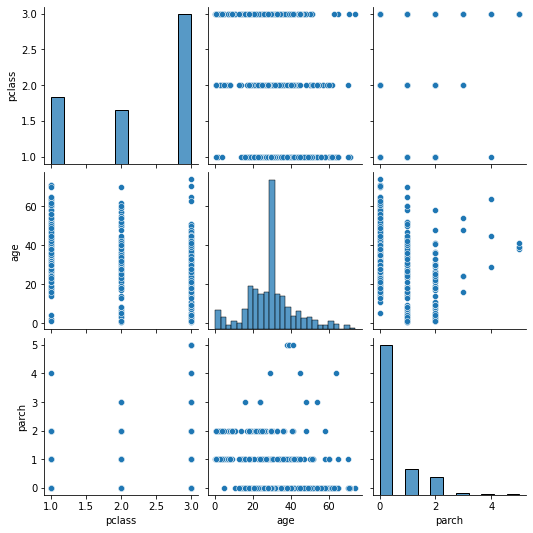

In [35]:
sns.pairplot(X_train)

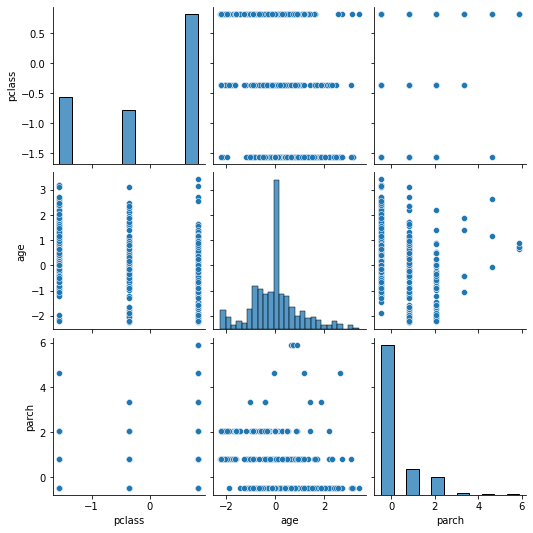

In [36]:
sns.pairplot(X_train_sc)

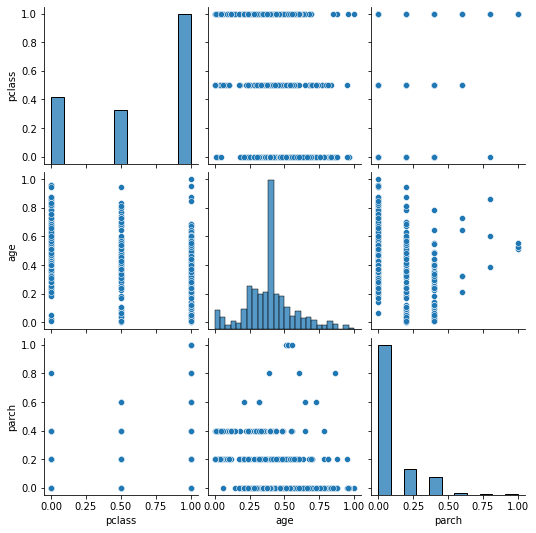

In [37]:
sns.pairplot(X_train_mmc)